In [1]:
%matplotlib inline

In [106]:
#import dependency
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import os

In [31]:
#files to load from resources
city_data_to_load = os.path.join("Resources", "city_data.csv");
ride_data_to_load = os.path.join("Resources", "ride_data.csv");

#load the data from csv into dataframe for both city and rides
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [53]:
#merge the data and create a consolidated view
pyber_merged_data_df = pd.merge(city_data_df, ride_data_df, how='right', left_on='city', right_on='city')
pyber_merged_data_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [54]:
#rename the column names
pyber_data_df = pyber_merged_data_df.rename(columns={'city':'City', 'date': 'Date', 'fare': 'Fare', 
                             'ride_id': 'Ride Id', 'driver_count': 'No. Drivers',
                             'type': 'City Type'})

#set date as the index
pyber_data_df = pyber_data_df.set_index(['Date'])
pyber_data_df

,City,No. Drivers,City Type,Fare,Ride Id
Date,,,,,
2019-02-24 08:40:38,Richardfort,38,Urban,13.93,5628545007794
2019-02-13 12:46:07,Richardfort,38,Urban,14.00,910050116494
2019-02-16 13:52:19,Richardfort,38,Urban,17.92,820639054416
2019-02-01 20:18:28,Richardfort,38,Urban,10.26,9554935945413
2019-04-17 02:26:37,Richardfort,38,Urban,23.00,720020655850
...,...,...,...,...,...
2019-01-31 17:57:25,Jessicaport,1,Rural,58.29,623154556195
2019-02-20 16:32:36,South Saramouth,7,Rural,44.29,3622365199969
2019-01-28 15:55:33,South Saramouth,7,Rural,31.25,7118046558393


In [34]:
help(pyber_data_df.copy)

Help on method copy in module pandas.core.generic:

copy(deep:bool=True) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Make a copy of this object's indices and data.
    
    When ``deep=True`` (default), a new object will be created with a
    copy of the calling object's data and indices. Modifications to
    the data or indices of the copy will not be reflected in the
    original object (see notes below).
    
    When ``deep=False``, a new object will be created without copying
    the calling object's data or index (only references to the data
    and index are copied). Any changes to the data of the original
    will be reflected in the shallow copy (and vice versa).
    
    Parameters
    ----------
    deep : bool, default True
        Make a deep copy, including a copy of the data and the indices.
        With ``deep=False`` neither the indices nor the data are copied.
    
    Returns
    -------
    copy : Series or DataFrame
        Object type matc

In [81]:
#create a copy of the merged data as fare data frame
pyber_fare_data_df = pyber_merged_data_df[["date", "type", "fare"]].copy()
pyber_fare_data_df = pyber_fare_data_df.rename(columns={"date":"Date", "type": "City Type", "fare": "Fare"})
#convert Date from object to datatime
pyber_fare_data_df['Date'] = pd.to_datetime(pyber_fare_data_df['Date'])
pyber_fare_data_df = pyber_fare_data_df.set_index(["Date"])

#remove the index name
#pyber_fare_data_df.index.name =None

pyber_fare_data_df

,City Type,Fare
Date,,
2019-02-24 08:40:38,Urban,13.93
2019-02-13 12:46:07,Urban,14.00
2019-02-16 13:52:19,Urban,17.92
2019-02-01 20:18:28,Urban,10.26
2019-04-17 02:26:37,Urban,23.00
...,...,...
2019-01-31 17:57:25,Rural,58.29
2019-02-20 16:32:36,Rural,44.29
2019-01-28 15:55:33,Rural,31.25


In [89]:
#create sum of the fare by data and city type
sum_per_city_date_fare_df = pyber_fare_data_df.groupby(['City Type','Date']).sum()
#reset the index
sum_per_city_date_fare_df.reset_index()
sum_per_city_date_fare_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [93]:
#create a pivot table
fare_city_type_pivot_table =sum_per_city_date_fare_df.pivot_table(index=['Date'], columns=['City Type'])
fare_city_type_pivot_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [96]:
fare_city_type_from_Jan_Apr_df = fare_city_type_pivot_table.loc['2019-01-01':'2019-04-28']
fare_city_type_from_Jan_Apr_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [99]:
#resample the data into weekly bins and calculate the sum of the fares for each week
weekly_fare_per_city_type_df = fare_city_type_from_Jan_Apr_df.resample('W').sum()
weekly_fare_per_city_type_df

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

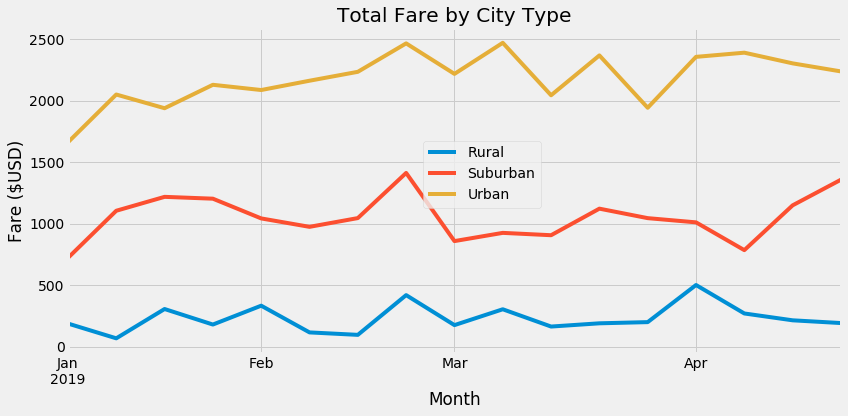

In [130]:
#create a line chart using 538 style
style.use('fivethirtyeight')
ax = weekly_fare_per_city_type_df.plot(kind="line", figsize=(12,6), title="Total Fare by City Type")
#set labels and legend
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
ax.legend(loc="center left", labels=("Rural", "Suburban", "Urban"), bbox_to_anchor=(0.45, 0.55))
plt.tight_layout()
#save the figure
plt.save_figure("analysis/Fig")